In [1]:
import time
import random
import matplotlib.pyplot as plt

In [2]:
def evaluate_postfix(expression):
    stack = []
    tokens = expression.strip().split()

    for token in tokens:
        if token.isdigit():
            stack.append(int(token))
        else:
            b = stack.pop()
            a = stack.pop()
            if token == '+':
                stack.append(a + b)
            elif token == '-':
                stack.append(a - b)
            elif token == '*':
                stack.append(a * b)

    return stack.pop()

# Пример использования:
expression = "5 3 2 + 3 * +"
print(evaluate_postfix(expression))  


20


In [3]:
def is_valid_parentheses(structure):
    stack = []

    for char in structure:
        if char == '(':
            stack.append(char)
        elif char == ')':
            if not stack:
                return False  
            stack.pop()  

    return len(stack) == 0 

# Пример использования:
structures = ["()", "(0)", "00", ")(0", "( )"]
for s in structures:
    print(f"{s}: {is_valid_parentheses(s)}")


(): True
(0): True
00: True
)(0: False
( ): True


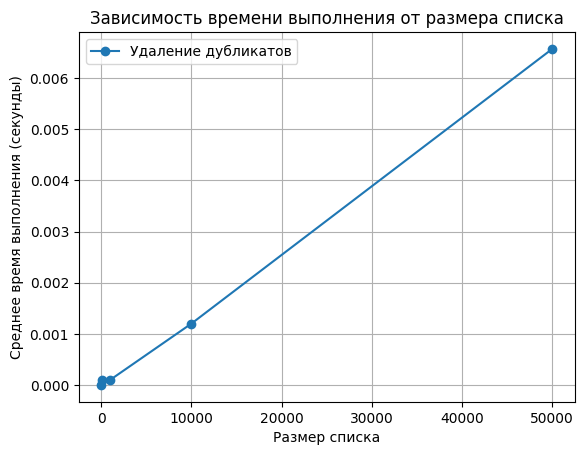

In [4]:
def remove_duplicates(sorted_list):
    if not sorted_list:
        return []

    unique_list = [sorted_list[0]]
    for i in range(1, len(sorted_list)):
        if sorted_list[i] != sorted_list[i - 1]:
            unique_list.append(sorted_list[i])

    return unique_list

# Замеры времени
def time_measure():
    sizes = [10, 100, 1000, 10000, 50000]
    results = []

    for size in sizes:
        sorted_list = sorted(random.randint(0, size//2) for _ in range(size))
        total_time = 0
        iterations = 10  

        for _ in range(iterations):
            start_time = time.time()
            remove_duplicates(sorted_list)
            total_time += time.time() - start_time

        average_time = total_time / iterations
        results.append((size, average_time))

    return results

# Построение графика
def plot_results(results):
    sizes, times = zip(*results)
    plt.plot(sizes, times, marker="o", label="Удаление дубликатов")
    plt.xlabel("Размер списка")
    plt.ylabel("Среднее время выполнения (секунды)")
    plt.title("Зависимость времени выполнения от размера списка")
    plt.grid(True)
    plt.legend()
    plt.show()

# Запуск замеров и построение графика
execution_results = time_measure()
plot_results(execution_results)
